<a href="https://colab.research.google.com/github/tmq24/MachineLearning/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyze
2. Preprocess data
3. Feature Engineering
4. Build Model Pipeline
5. Measure performance of the model.
6. Which metric is your main metric for this problem and why? What is your main model as well as their params and why? Your comment


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. Data Analysis is correct or make sense
4. The data preprocessing is correct or make sense
5. The Feature engineering is correct or make sense
6. Model pipeline
7. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
import gdown

url = f"https://drive.google.com/uc?id=1k9ad8ks2PHY-nqOLJk6rzQukdHArU5tg"

output = "credit_fraud.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k9ad8ks2PHY-nqOLJk6rzQukdHArU5tg
To: /content/credit_fraud.csv
100%|██████████| 3.01M/3.01M [00:00<00:00, 45.0MB/s]


'credit_fraud.csv'

GENDER CAR REALITY  NO_OF_CHILD    INCOME           INCOME_TYPE  \
0      M   Y       Y            0  112500.0               Working   
1      F   N       Y            0  270000.0  Commercial associate   
2      F   N       Y            0  270000.0  Commercial associate   
3      F   N       Y            0  270000.0  Commercial associate   
4      F   N       Y            0  270000.0  Commercial associate   

                  EDUCATION_TYPE           FAMILY_TYPE         HOUSE_TYPE  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   FLAG_MOBIL  WORK_PHONE  PHONE  E_MAIL  FAMILY SIZE  BEGIN_MONTH  AGE  \
0           1           0      0       0          2.0           29   59   
1           1           0      1       1          1.0            4   52   
2           1           0      1       1          1.0           26   52   
3           1           0      1       1          1.0           26   52   
4           1           0      1       1          1.0           38   52   

   YEARS_EMPLOYED  TARGET  
0               3       0  
1               8       0  
2               8       0  
3               8       0  
4               8       0

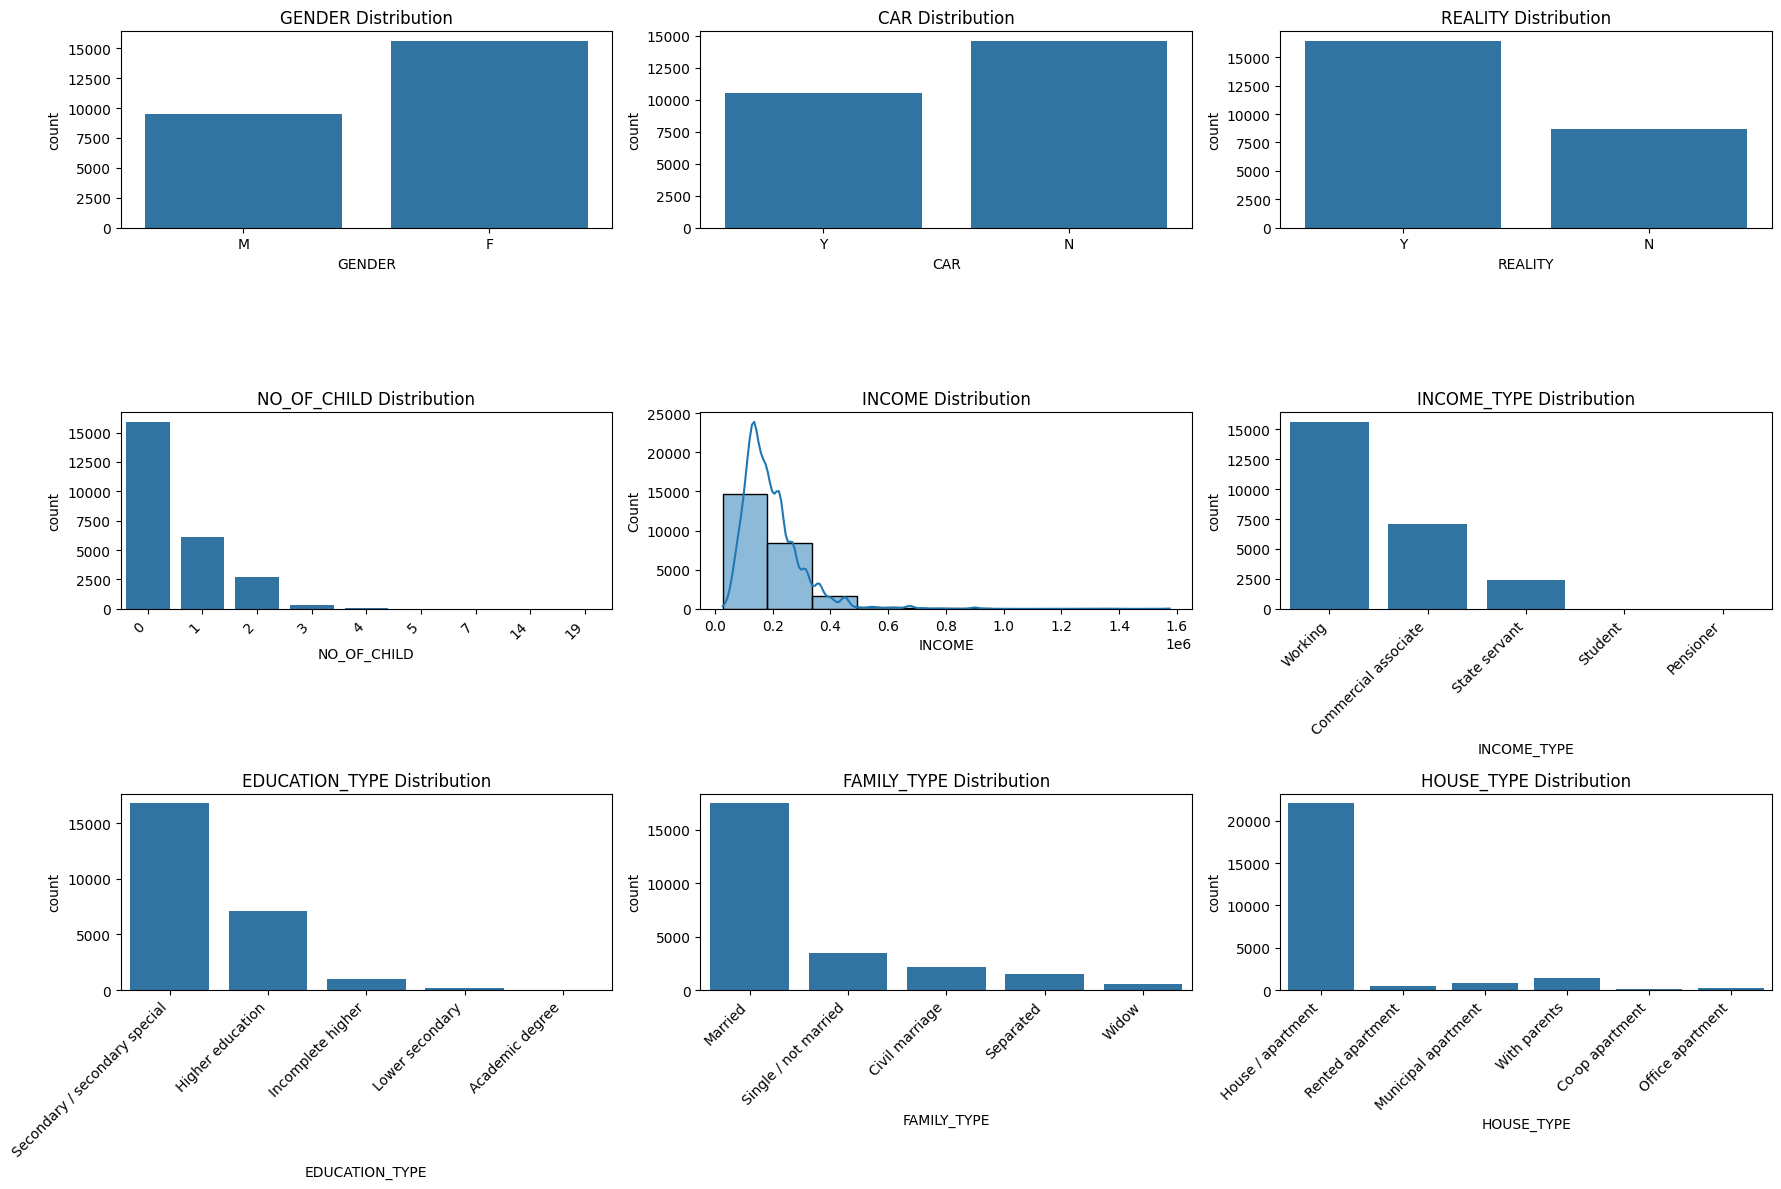

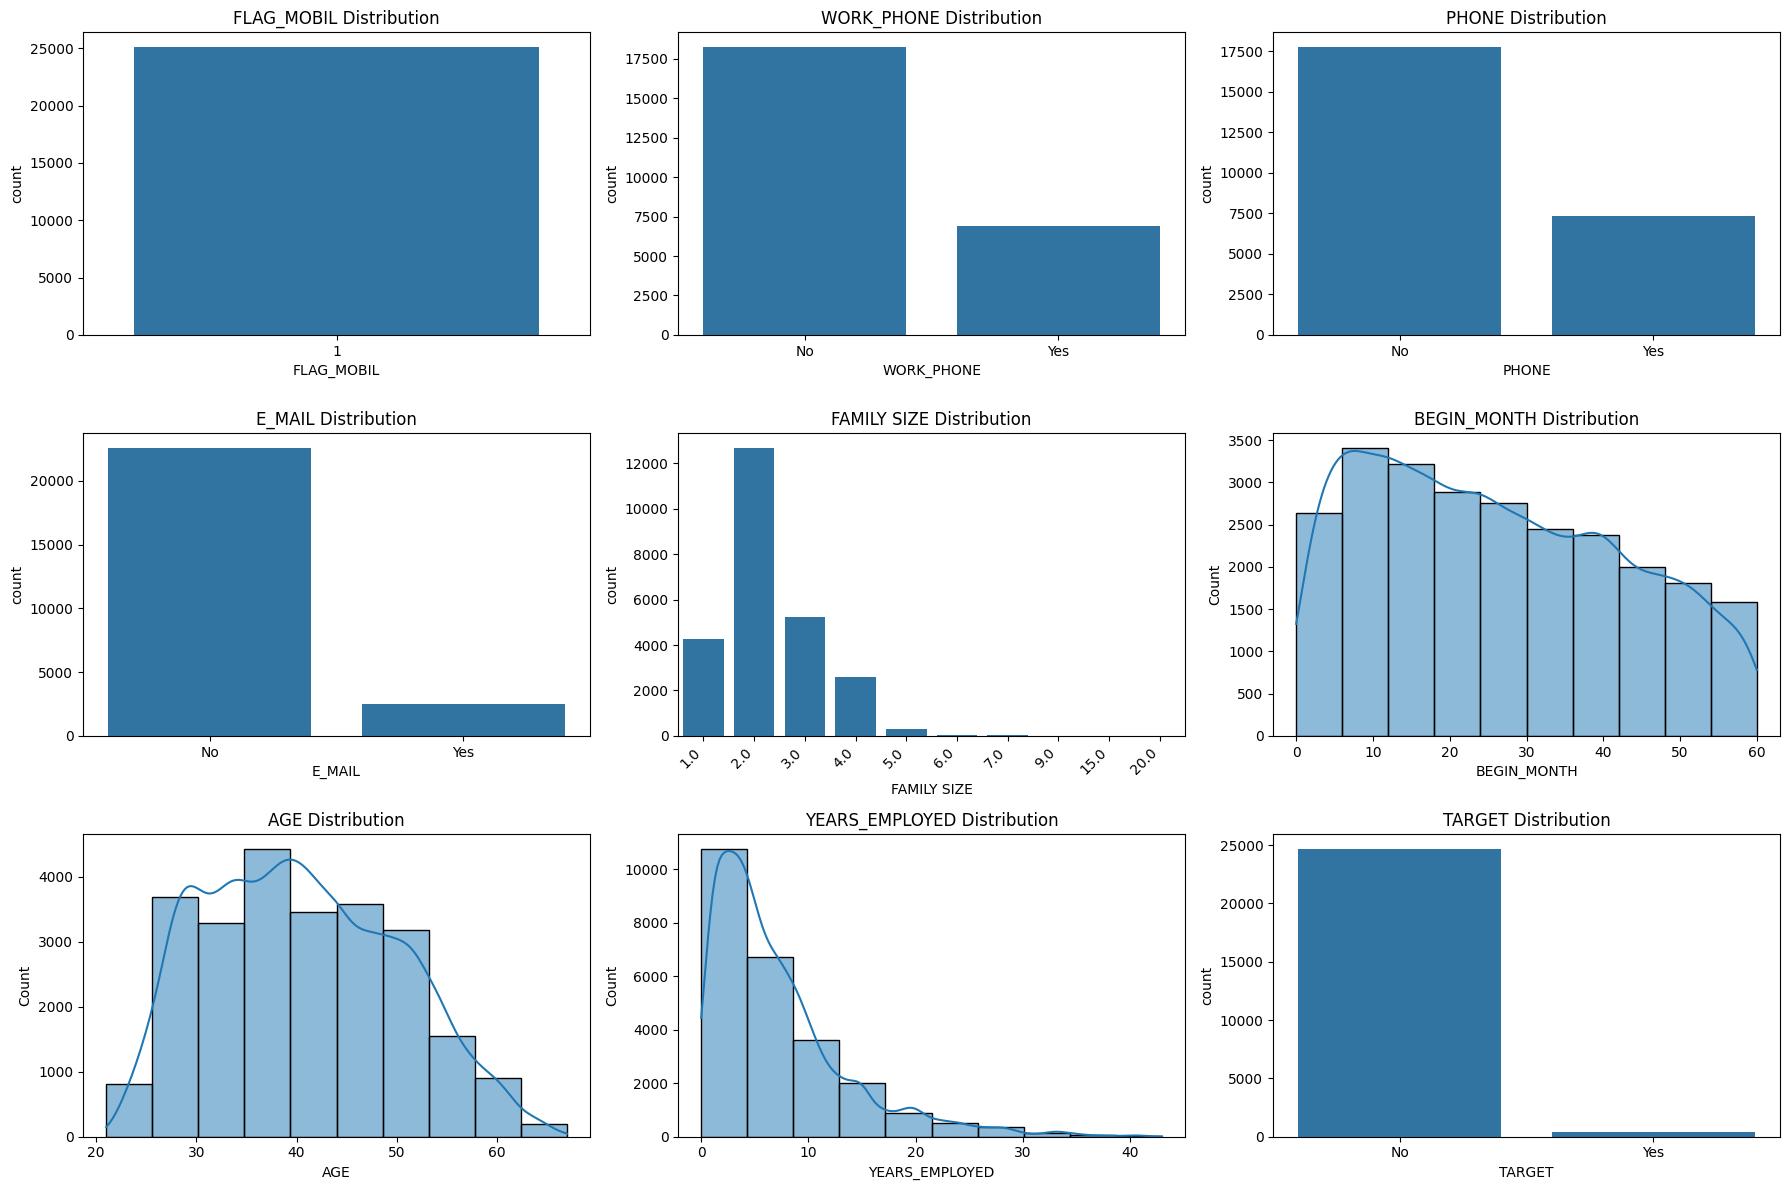

In [ ]:
import pandas as pd
PATH = "/content/credit_fraud.csv" # Path to your file

df = pd.read_csv(PATH)
df = df.iloc[:, 2:]
display(df.head())
#ToDo: Show histogram of dataframe
cols_to_plot = df.columns
n_cols = len(cols_to_plot)
plots_per_figure = 9
n_figures = (n_cols + plots_per_figure - 1) // plots_per_figure

for fig_num in range(n_figures):
    plt.figure(figsize=(18, 12))
    start_col_idx = fig_num * plots_per_figure
    end_col_idx = min((fig_num + 1) * plots_per_figure, n_cols)

    for i in range(start_col_idx, end_col_idx):
        col_index_in_figure = i - start_col_idx
        col = cols_to_plot[i]
        plt.subplot(3, 3, col_index_in_figure + 1)

        if df[col].dtype == 'object' or df[col].nunique() <= 10:
            sns.countplot(x=col, data=df)
            plt.title(f'{col} Distribution')

            if df[col].nunique() == 2 and set(df[col].unique()) == {0, 1}:
                plt.xticks([0, 1], ['No', 'Yes'])

            elif df[col].nunique() > 2:
                plt.xticks(rotation=45, ha='right')

        else:
            sns.histplot(df[col], bins=10, kde=True)
            plt.title(f'{col} Distribution')

    plt.tight_layout()
    plt.show()

## Data Analysis

In [ ]:
pip -q install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df)
# Todo: analyze your data here

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 19.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Check logic giữa 'AGE' và 'YEARS_EMPLOYED' xem có dòng nào có số năm làm việc lớn hơn số tuổi không

In [ ]:
# Giả sử độ tuổi bắt đầu làm việc là 16
min_working_age = 16
inconsistent_records = df[df['AGE'] - df['YEARS_EMPLOYED'] < min_working_age]
print(f"{len(inconsistent_records)}")

0


- Xem xét gộp 'married' và 'civil marriage' do có cùng ý nghĩa

In [ ]:
fraud_by_family = df.groupby('FAMILY_TYPE')['TARGET'].agg(['count', 'mean'])
print(fraud_by_family)

married_fraud = df[df['FAMILY_TYPE'] == 'Married']['TARGET'].mean()
civil_fraud = df[df['FAMILY_TYPE'] == 'Civil marriage']['TARGET'].mean()
print(f"Married fraud rate: {married_fraud:.4f}")
print(f"Civil marriage fraud rate: {civil_fraud:.4f}")

                      count      mean
FAMILY_TYPE                          
Civil marriage         2133  0.015002
Married               17509  0.015820
Separated              1467  0.010225
Single / not married   3445  0.024093
Widow                   580  0.025862
Married fraud rate: 0.0158
Civil marriage fraud rate: 0.0150


## Preprocessing

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.drop(columns=['FLAG_MOBIL'], axis=1)
    df['FAMILY_TYPE'] = df['FAMILY_TYPE'].replace(['Civil marriage'], 'Married')
    return df

In [ ]:
df = preprocessing_data(df.copy())
df


GENDER CAR REALITY  NO_OF_CHILD    INCOME           INCOME_TYPE  \
0          M   Y       Y            0  112500.0               Working   
1          F   N       Y            0  270000.0  Commercial associate   
2          F   N       Y            0  270000.0  Commercial associate   
3          F   N       Y            0  270000.0  Commercial associate   
4          F   N       Y            0  270000.0  Commercial associate   
...      ...  ..     ...          ...       ...                   ...   
25129      M   Y       Y            0  315000.0               Working   
25130      F   N       Y            0  157500.0  Commercial associate   
25131      F   N       Y            0  157500.0             Pensioner   
25132      F   N       Y            0  283500.0               Working   
25133      M   N       Y            0  112500.0               Working   

                      EDUCATION_TYPE           FAMILY_TYPE         HOUSE_TYPE  \
0      Secondary / secondary special               Married  House / apartment   
1      Secondary / secondary special  Single / not married  House / apartment   
2      Secondary / secondary special  Single / not married  House / apartment   
3      Secondary / secondary special  Single / not married  House / apartment   
4      Secondary / secondary special  Single / not married  House / apartment   
...                              ...                   ...                ...   
25129  Secondary / secondary special               Married  House / apartment   
25130               Higher education               Married  House / apartment   
25131               Higher education               Married  House / apartment   
25132  Secondary / secondary special               Married  House / apartment   
25133  Secondary / secondary special  Single / not married   Rented apartment   

       WORK_PHONE  PHONE  E_MAIL  FAMILY SIZE  BEGIN_MONTH  AGE  \
0               0      0       0          2.0           29   59   
1               0      1       1          1.0            4   52   
2               0      1       1          1.0           26   52   
3               0      1       1          1.0           26   52   
4               0      1       1          1.0           38   52   
...           ...    ...     ...          ...          ...  ...   
25129           0      0       0          2.0           11   48   
25130           0      1       1          2.0           23   34   
25131           0      1       1          2.0           32   34   
25132           0      0       0          2.0            9   49   
25133           0      0       0          1.0           13   25   

       YEARS_EMPLOYED  TARGET  
0                   3       0  
1                   8       0  
2                   8       0  
3                   8       0  
4                   8       0  
...               ...     ...  
25129               7       1  
25130               4       1  
25131               4       1  
25132               2       1  
25133               3       1  

[25134 rows x 17 columns]

## Feature Engineering

0         1         2         3  \
GENDER                                   1         0         0         0   
CAR                                      1         0         0         0   
REALITY                                  1         1         1         1   
NO_OF_CHILD                              0         0         0         0   
INCOME                            112500.0  270000.0  270000.0  270000.0   
EDUCATION_TYPE                           1         1         1         1   
WORK_PHONE                               0         0         0         0   
PHONE                                    0         1         1         1   
E_MAIL                                   0         1         1         1   
FAMILY SIZE                            2.0       1.0       1.0       1.0   
BEGIN_MONTH                             29         4        26        26   
AGE                                     59        52        52        52   
YEARS_EMPLOYED                           3         8         8         8   
TARGET                                   0         0         0         0   
INCOME_TYPE_Commercial associate     False      True      True      True   
INCOME_TYPE_Pensioner                False     False     False     False   
INCOME_TYPE_State servant            False     False     False     False   
INCOME_TYPE_Student                  False     False     False     False   
INCOME_TYPE_Working                   True     False     False     False   
FAMILY_TYPE_Married                   True     False     False     False   
FAMILY_TYPE_Separated                False     False     False     False   
FAMILY_TYPE_Single / not married     False      True      True      True   
FAMILY_TYPE_Widow                    False     False     False     False   
HOUSE_TYPE_Co-op apartment           False     False     False     False   
HOUSE_TYPE_House / apartment          True      True      True      True   
HOUSE_TYPE_Municipal apartment       False     False     False     False   
HOUSE_TYPE_Office apartment          False     False     False     False   
HOUSE_TYPE_Rented apartment          False     False     False     False   
HOUSE_TYPE_With parents              False     False     False     False   

                                         4  
GENDER                                   0  
CAR                                      0  
REALITY                                  1  
NO_OF_CHILD                              0  
INCOME                            270000.0  
EDUCATION_TYPE                           1  
WORK_PHONE                               0  
PHONE                                    1  
E_MAIL                                   1  
FAMILY SIZE                            1.0  
BEGIN_MONTH                             38  
AGE                                     52  
YEARS_EMPLOYED                           8  
TARGET                                   0  
INCOME_TYPE_Commercial associate      True  
INCOME_TYPE_Pensioner                False  
INCOME_TYPE_State servant            False  
INCOME_TYPE_Student                  False  
INCOME_TYPE_Working                  False  
FAMILY_TYPE_Married                  False  
FAMILY_TYPE_Separated                False  
FAMILY_TYPE_Single / not married      True  
FAMILY_TYPE_Widow                    False  
HOUSE_TYPE_Co-op apartment           False  
HOUSE_TYPE_House / apartment          True  
HOUSE_TYPE_Municipal apartment       False  
HOUSE_TYPE_Office apartment          False  
HOUSE_TYPE_Rented apartment          False  
HOUSE_TYPE_With parents              False

<Axes: >

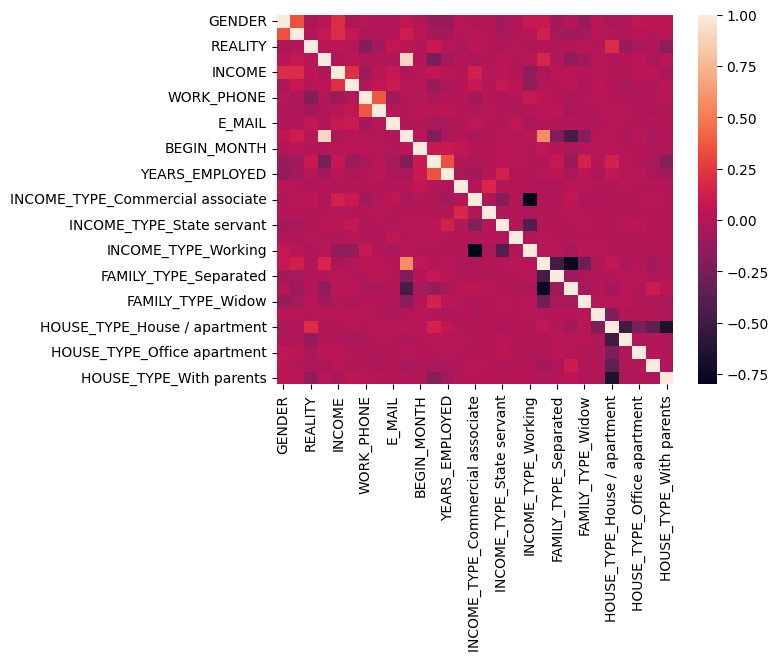

In [ ]:
# Heatmap
import seaborn as sns
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = df.copy()
    df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})
    df['CAR'] = df['CAR'].map({'Y': 1, 'N': 0})
    df['REALITY'] = df['REALITY'].map({'Y': 1, 'N': 0})

    education_order = {
        'Lower secondary': 0,
        'Secondary / secondary special': 1,
        'Incomplete higher': 2,
        'Higher education': 3,
        'Academic degree': 4
    }
    df['EDUCATION_TYPE'] = df['EDUCATION_TYPE'].map(education_order)

    df = pd.get_dummies(df, columns=['INCOME_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE'])
    return df

df = apply_feature_engineering(df)
display(df.head().T)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('TARGET', axis=1) # Todo: Select features
    y = df['TARGET'] # Todo: Select label
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    return X, y

X, y = prepare_X_y(df)

X shape: (25134, 28)
y shape: (25134,)


# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# param_grid = {
#         'kernel': ['linear', 'rbf'],
#         'C': [0.01, 0.1, 1, 10],
#         'gamma': ['scale', 'auto'],
#         'class_weight': [None, 'balanced'],
#     }
# gridsearch = make_pipeline(StandardScaler(), GridSearchCV(SVC(), param_grid, cv=5, scoring="recall", verbose=1))
# gridsearch.fit(trainX_res, trainY_res)
# gridsearch[1].best_params_

C = 0.01, class_weight = 'balanced', gamma = 'scale', kernel = 'rbf'

In [ ]:
from sklearn.metrics import *

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    model = make_pipeline(StandardScaler(), SVC(C = 0.01, class_weight = 'balanced', gamma = 'scale', kernel = 'rbf'))
    model.fit(X, y)

    return model

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    print("precision", precision_score(y_true , y_pred))
    print("recall", recall_score(y_true , y_pred))
    print("accuracy", accuracy_score(y_true , y_pred))
    print("F1", f1_score(y_true , y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))
    print("Classification report: \n", classification_report(y_true , y_pred))

    print("Main Score (Recall):")
    main_score = recall_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)

precision 0.02904162633107454
recall 0.6870229007633588
accuracy 0.5955443575122663
F1 0.05572755417956656
Confusion matrix: 
 [[4401 3009]
 [  41   90]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.59      0.74      7410
           1       0.03      0.69      0.06       131

    accuracy                           0.60      7541
   macro avg       0.51      0.64      0.40      7541
weighted avg       0.97      0.60      0.73      7541

Main Score (Recall):


0.6870229007633588

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "6. Other conclusion: " \
           "Mô hình SVM không tham số đạt recall 0.0229, precision 0.75, nhưng bỏ sót hầu hết lớp 1 (gian lận), cho thấy cần ưu tiên recall để phát hiện rủi ro trong dữ liệu không cân bằng (7410 lớp 0, 131 lớp 1). Sau khi tune với C=0.01, class_weight='balanced', gamma='scale', kernel='rbf', recall tăng lên 0.6870(recall cao nhất trong những lần thử), phù hợp với mục tiêu phát hiện lớp thiểu số, dù precision giảm còn 0.0290 do false positives cao (3009). Lý do em chọn recall là vì bài toán này tập trung vào giảm thiểu bỏ sót gian lận, quan trọng hơn là giảm sai sót. Ý kiến khác: nên thử train với tập train được cân bằng và cần có nhiều tài nguyên và thời gian hơn."


get_conclusion()

"6. Other conclusion: Mô hình SVM không tham số đạt recall 0.0229, precision 0.75, nhưng bỏ sót hầu hết lớp 1 (gian lận), cho thấy cần ưu tiên recall để phát hiện rủi ro trong dữ liệu không cân bằng (7410 lớp 0, 131 lớp 1). Sau khi tune với C=0.01, class_weight='balanced', gamma='scale', kernel='rbf', recall tăng lên 0.6870(recall cao nhất trong những lần thử), phù hợp với mục tiêu phát hiện lớp thiểu số, dù precision giảm còn 0.0290 do false positives cao (3009). Lý do em chọn recall là vì bài toán này tập trung vào giảm thiểu bỏ sót gian lận, quan trọng hơn là giảm sai sót. Ý kiến khác: nên thử train với tập train được cân bằng và cần có nhiều tài nguyên và thời gian hơn."